In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ;  sns.set_theme()


In [3]:
#load dataset
dataset_filepath = "C:/Users/z004fuuz/Desktop/ML/car_price.csv" 
dataset = pd.read_csv(dataset_filepath)
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Drop Some Features
dataset = dataset.drop(columns = ["CarName","aspiration","doornumber","carbody","drivewheel","enginelocation","fuelsystem","enginetype","cylindernumber","fueltype","car_ID"], axis = 1)
dataset

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
#Data and Feature Numbers
dataset.shape

(205, 15)

<AxesSubplot:>

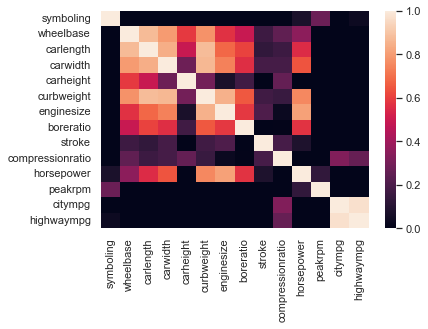

In [6]:
#check correlation
dataset_without_output = dataset.drop("price", axis = 1) #delete as y axis
correlation_df = dataset_without_output.corr() #gives correlation as negative or positive number
sns.heatmap(correlation_df,vmin=0, vmax=1)  #vmin, vmax for see clearly, it changes limits of colormap

In [7]:
#Find correlated features
correlated_features1 = ['citympg','highwaympg']
correlated_features2 = ['carlength','wheelbase']

In [8]:
#X and Y preparation
X = dataset_without_output
Y = dataset["price"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state = 42)
X_train.shape , Y_train.shape

((164, 14), (164,))

In [9]:
#Create Model with Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
linear_regression.intercept_, linear_regression.coef_ , X_test.shape


(-51944.70156970931,
 array([ 2.08925033e+02,  1.40385781e+02, -7.78472888e+01,  5.25580891e+02,
         2.01090018e+02,  4.45754407e-01,  1.23348827e+02, -3.63203632e+02,
        -3.18813291e+03,  3.61030613e+02,  1.79331085e+01,  2.58860271e+00,
        -4.64861603e+02,  2.25531324e+02]),
 (41, 14))

In [10]:
#Predict with Linear Regression
from sklearn.metrics import mean_absolute_error
Y_prediction = linear_regression.predict(X_test) #make prediction
#Predict with Linear Regression Absolute Error
linear_regression_mae = mean_absolute_error(Y_test, Y_prediction)
linear_regression_mae

2680.429983159402

In [11]:
#Get Accuracy
print(f'Training Data Accuracy: {round(linear_regression.score(X_train, Y_train)* 100,2)}%')
print(f'Predictive Data Accuracy: {round(linear_regression.score(X_test, Y_test)* 100,2)}%')

Training Data Accuracy: 85.79%
Predictive Data Accuracy: 81.81%


<function matplotlib.pyplot.show(close=None, block=None)>

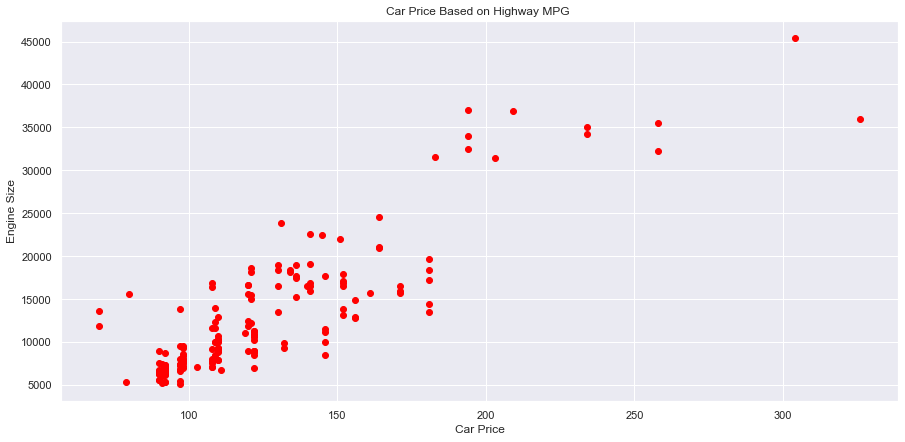

In [12]:
plt.rcParams['figure.figsize'] = [15,7]
plt.scatter(X_train["enginesize"], Y_train, color ='red')
plt.ylabel('Engine Size')
plt.xlabel('Car Price')
plt.title('Car Price Based on Highway MPG ')
plt.show

In [20]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train["enginesize"], Y_train)

X_test_descending = np.sort(X_test["enginesize"], axis = 0)
X_test_descending = X_test_descending.reshape(41,1)
y_predict = linear_regression.predict(X_test_descending)

plt.plot(np.array[(0.1), X_train["enginesize"]), Y_train, "r.")
plt.plot(X_test_descending, y_predict, "b-")
plt.ylabel('Engine Size')
plt.xlabel('Car Price')
plt.title('Car Price Training Data')
plt.show


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (Temp/ipykernel_9940/4237071686.py, line 9)

In [ ]:
#Save trained Model
import pickle
file_name = 'trained_car_price_model.sav' #sav is for statistical purposes
pickle.dump(linear_regression, open(file_name ,'wb')) # wb = write binary